# Linear Regression with one variable

Here we will implement linear regression with one variable to predict profits for a food truck. Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities.

The file ex1data1.txt contains the dataset for our linear regression exercise. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

In [1]:
#importing certain libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading data

In [2]:
data = pd.read_csv('ex1data1.txt',header = None) #Read from dataset

X = data.iloc[:,0]; #Read first column
y = data.iloc[:,1]; #Read second column

m = len(y) #number of training examples

data.head()  # view first five rows of data


,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Plotting data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).

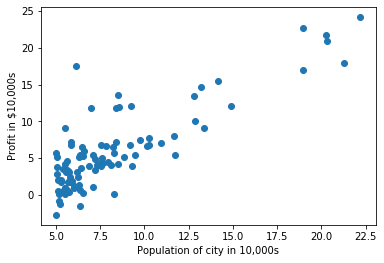

In [3]:
plt.scatter(X,y)
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

### Adding the intercept term

we add another dimension to our data to accommodate the intercept term . We also initialize the initial parameters theta to 0 and the learning rate alpha to 0.01

In [4]:

X = X[:,np.newaxis] #convert rank 1 array to rank 2 array
y = y[:,np.newaxis]

theta = np.zeros([2,1]) #initialize the initial parameter theta to 0

iterations = 1500

alpha = 0.01 #initialize learning rate to 0.01

ones = np.ones((m,1)) #this ii use as X0 term because X0 = 1

X = np.hstack((ones,X)) #adding intercept term

### Computing the cost

In [5]:
def ComputeCost(X,y,theta):
    temp = np.dot(X,theta) - y
    return np.sum(np.power(temp , 2)) / (2*m)

J = ComputeCost(X,y,theta)
print(J)

32.072733877455676


### Finding the optimal parameters using Gradient Descent

In [6]:
def GradientDescent(X,y,theta, alpha , iterations):
    for _ in range(iterations):
        temp = np.dot(X,theta) - y
        temp = np.dot(X.T , temp)
        theta = theta - (alpha/m) *temp
    return theta

theta = GradientDescent(X,y,theta,alpha,iterations)

print(theta)

[[-3.63029144]
 [ 1.16636235]]


### Using optimized theta values in cost function

In [7]:
J = ComputeCost(X,y,theta)

print(J)

4.483388256587726


### Plot showing the best fit line

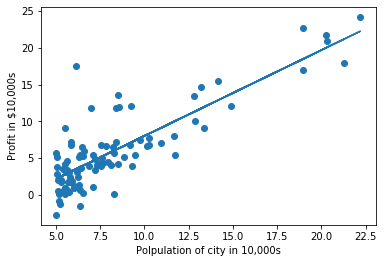

In [8]:
plt.scatter(X[:,1],y)
plt.xlabel('Polpulation of city in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.plot(X[:,1],np.dot(X,theta)) #ploting a line
plt.show()

### Predicting Profit

In [9]:
def Predict(X_test):
    profit = np.dot(X_test,theta)
    return profit

In [10]:
predict_data = pd.read_csv('predict_profit.txt') #loading prediction data

predict_data = predict_data.iloc[:,0] 

predict_data = predict_data[:,np.newaxis]  #convert rank 1 array to rank 2 array

m_predict = len(predict_data)
ones = np.ones((m_predict , 1))

predict_data = np.hstack((ones,predict_data)) #adding intercept term

In [11]:
predicted_profit = Predict(predict_data)

print(predicted_profit)

[[ 2.57603926]
 [11.41298361]
 [-2.19088366]
 [-0.63798883]
 [ 5.5723075 ]
 [ 7.27006454]
 [ 1.55348939]
 [ 2.99289717]
 [ 6.49198422]
 [26.32061072]]
